# Flights example

In [1]:
import numpy as np
import pandas
from IPython.core.display import display

import raha

## Run error detection and repair 30 times

We use ground truth to label 20 tuples in each run.

In [2]:
datasets = []

for i in range(30):
    from raha import analysis_utilities
    app_1 = raha.Detection()
    app_2 = raha.Correction()

    # How many tuples would you label?
    app_1.LABELING_BUDGET = 20
    app_2.LABELING_BUDGET = 0

    # Would you like to see the logs?
    app_1.VERBOSE = False
    app_2.VERBOSE = False

    dataset_dictionary = {
        "name": "flights",
        "path": "datasets/flights/dirty.csv",
        "clean_path": "datasets/flights/clean.csv"
    }
    d = app_1.initialize_dataset(dataset_dictionary)

    app_1.run_strategies(d)
    app_1.generate_features(d)
    app_1.build_clusters(d)

    while len(d.labeled_tuples) < app_1.LABELING_BUDGET:
        app_1.sample_tuple(d)
        if d.has_ground_truth:
            app_1.label_with_ground_truth(d)

    app_1.propagate_labels(d)
    app_1.predict_labels(d)

    app_2.initialize_models(d)
    app_2.initialize_dataset(d)
    for si in d.labeled_tuples:
        d.sampled_tuple = si
        app_2.update_models(d)
        app_2.generate_features(d)
        app_2.predict_corrections(d)

    print(f"Run {i} done")

    datasets.append(d)

I just load strategies' results as they have already been run on the dataset!


Run 0 done


I just load strategies' results as they have already been run on the dataset!


Run 1 done


I just load strategies' results as they have already been run on the dataset!


Run 2 done


I just load strategies' results as they have already been run on the dataset!


Run 3 done


I just load strategies' results as they have already been run on the dataset!


Run 4 done


I just load strategies' results as they have already been run on the dataset!


Run 5 done


I just load strategies' results as they have already been run on the dataset!


Run 6 done


I just load strategies' results as they have already been run on the dataset!


Run 7 done


I just load strategies' results as they have already been run on the dataset!


Run 8 done


I just load strategies' results as they have already been run on the dataset!


Run 9 done


I just load strategies' results as they have already been run on the dataset!


Run 10 done


I just load strategies' results as they have already been run on the dataset!


Run 11 done


I just load strategies' results as they have already been run on the dataset!


Run 12 done


I just load strategies' results as they have already been run on the dataset!


Run 13 done


I just load strategies' results as they have already been run on the dataset!


Run 14 done


I just load strategies' results as they have already been run on the dataset!


Run 15 done


I just load strategies' results as they have already been run on the dataset!


Run 16 done


I just load strategies' results as they have already been run on the dataset!


Run 17 done


I just load strategies' results as they have already been run on the dataset!


Run 18 done


I just load strategies' results as they have already been run on the dataset!


Run 19 done


I just load strategies' results as they have already been run on the dataset!


Run 20 done


I just load strategies' results as they have already been run on the dataset!


Run 21 done


I just load strategies' results as they have already been run on the dataset!


Run 22 done


I just load strategies' results as they have already been run on the dataset!


Run 23 done


I just load strategies' results as they have already been run on the dataset!


Run 24 done


I just load strategies' results as they have already been run on the dataset!


Run 25 done


I just load strategies' results as they have already been run on the dataset!


Run 26 done


I just load strategies' results as they have already been run on the dataset!


Run 27 done


I just load strategies' results as they have already been run on the dataset!


Run 28 done


I just load strategies' results as they have already been run on the dataset!


Run 29 done


## Evaluation

In [3]:
evaluation_df = pandas.DataFrame(columns=["Task", "Precision", "Recall", "F1 Score"])

for d in datasets:
    edp, edr, edf = d.get_data_cleaning_evaluation(d.detected_cells)[:3]
    ecp, ecr, ecf = d.get_data_cleaning_evaluation(d.corrected_cells)[-3:]

    evaluation_df = evaluation_df.append({"Task": "Error Detection (Raha)", "Precision": edp,
                                          "Recall": edr, "F1 Score": edf}, ignore_index=True)
    evaluation_df = evaluation_df.append({"Task": "Error Correction (Baran)", "Precision": ecp,
                                          "Recall": ecr, "F1 Score": ecf}, ignore_index=True)
display(evaluation_df)

evaluation_df.groupby("Task").agg(["mean", "std", "min", "max"])

/home/adrian/source/MA/raha/raha/dataset.py:123: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if correction_dictionary[cell] == actual_errors[cell]:


,Task,Precision,Recall,F1 Score
0,Error Detection (Raha),0.766289,0.908333,0.831287
1,Error Correction (Baran),0.639432,0.512195,0.568785
2,Error Detection (Raha),0.831194,0.881707,0.855706
3,Error Correction (Baran),0.733747,0.552846,0.630578
4,Error Detection (Raha),0.785315,0.884756,0.832075
5,Error Correction (Baran),0.812541,0.505691,0.623403
6,Error Detection (Raha),0.879736,0.703252,0.781656
7,Error Correction (Baran),0.811678,0.539634,0.648272
8,Error Detection (Raha),0.914200,0.740650,0.818325
9,Error Correction (Baran),0.820193,0.534959,0.647558


Precision                                  Recall  \
                              mean       std       min       max      mean   
Task                                                                         
Error Correction (Baran)  0.802148  0.053720  0.639432  0.891446  0.545291   
Error Detection (Raha)    0.849906  0.051825  0.755079  0.932334  0.830542   

                                                        F1 Score            \
                               std       min       max      mean       std   
Task                                                                         
Error Correction (Baran)  0.035301  0.476626  0.637602  0.648318  0.035331   
Error Detection (Raha)    0.063403  0.683130  0.923577  0.836783  0.024060   

                                              
                               min       max  
Task                                          
Error Correction (Baran)  0.568785  0.743453  
Error Detection (Raha)    0.777829  0.878819

## Analyze the alternative repairs

In [4]:
alternative_count_list = []

for d in datasets:
    number_of_repairs = len(d.correction_collection)
    number_of_repairs_hist = dict()

    for cell_repairs in d.correction_collection.values():
        num = len(cell_repairs)
        number_of_repairs_hist[num] = number_of_repairs_hist.get(num, 0) + 1

    hist = [0] * (max(number_of_repairs_hist.keys()) + 1)
    for num, count in number_of_repairs_hist.items():
        hist[num] = count

    alternative_count_list.append(number_of_repairs_hist)

    #print(f"Histogram of the number of alternative repairs: {list(enumerate(hist))}")

max_alternatives = max(max(h.keys()) for h in alternative_count_list)

alternative_count_df = pandas.DataFrame(columns=list(range(max_alternatives + 1)))

for hist in alternative_count_list:
    alternative_count_df = alternative_count_df.append(hist, ignore_index=True)

alternative_count_df.drop(0,axis=1,inplace=True)
alternative_count_df = alternative_count_df.fillna(0)
alternative_count_df

,1,2,3,4
0,3631.0,247.0,9.0,0.0
1,3368.0,267.0,24.0,0.0
2,3001.0,11.0,0.0,0.0
3,2820.0,391.0,13.0,3.0
4,2856.0,259.0,48.0,6.0
5,3363.0,110.0,0.0,0.0
6,2943.0,227.0,0.0,0.0
7,2755.0,111.0,0.0,0.0
8,2804.0,80.0,7.0,0.0
9,3214.0,268.0,4.0,0.0


In [5]:
mean_number_of_repairs = (alternative_count_df * np.arange(1,max_alternatives+1,1)).sum(axis=1) / alternative_count_df.sum(axis=1)
mean_number_of_repairs.agg(["mean", "std", "min", "max"])

mean    1.059411
std     0.034408
min     1.003652
max     1.132011
dtype: float64

In [6]:
more_than_one = alternative_count_df.loc[:, alternative_count_df.columns[1:]].sum(axis=1) / alternative_count_df.sum(axis=1)
more_than_one.agg(["mean", "std", "min", "max"])

mean    0.055494
std     0.031158
min     0.003652
max     0.126123
dtype: float64

In [7]:
print("Mean number of cells with x predicted alternatives in 10 runs")
mean_count_series = alternative_count_df.mean()
mean_count_series

Mean number of cells with x predicted alternatives in 10 runs


1    3122.966667
2     174.133333
3      11.333333
4       0.966667
dtype: float64

In [8]:
correct_repairs = datasets[0].get_actual_errors_dictionary()

collection = []
correct_repair_probs = []
incorrect_repair_probs = []
other_repair_probs = []

for d in datasets:

    wrong_detection = 0
    alt_available_all = 0

    for cell, repairs in d.correction_collection.items():
        if cell in correct_repairs:
            if len(repairs) > 1:
                alt_available_all += 1
        else:
            wrong_detection += 1

    alt_rate = alt_available_all / len(d.correction_collection)

    error_repaired_cells = [cell for cell, correction in d.corrected_cells.items() if cell in correct_repairs and correction != correct_repairs[cell]]
    #print(f"Number of incorrectly repaired cells: {len(error_repaired_cells)}")

    error_rate = len(error_repaired_cells) / len(d.corrected_cells)
    alt_available = 0
    correct_repair_available = 0
    correct_repair_only = 0
    correct_repair_highest = 0
    correct_repair_better_chosen = 0

    for cell in error_repaired_cells:
        assert len(d.correction_collection[cell]) > 0
        if len(d.correction_collection[cell]) > 1:
            alt_available += 1
        if correct_repairs[cell] in d.correction_collection[cell].keys():
            correct_repair_available += 1
            other_repairs = d.correction_collection[cell].copy()
            other_repairs.pop(d.corrected_cells[cell], None)
            other_repairs.pop(correct_repairs[cell], None)
            if len(other_repairs) == 0:
                correct_repair_only += 1
            if d.correction_collection[cell][correct_repairs[cell]] > max(list(other_repairs.values()) + [0]):
                correct_repair_highest += 1
                if d.correction_collection[cell][correct_repairs[cell]] > d.correction_collection[cell][d.corrected_cells[cell]]:
                    correct_repair_better_chosen += 1

    #print(f"Number of incorrectly repaired cells, where the correct repair is among the alternative repairs: {correct_repair_available}")

    collection.append((len(d.correction_collection),
                       alt_available_all,
                       alt_rate,
                       len(error_repaired_cells),
                       error_rate,
                       wrong_detection,
                       alt_available,
                       correct_repair_available,
                       correct_repair_highest,
                       correct_repair_only,
                       correct_repair_better_chosen))

    for cell in error_repaired_cells:
        if correct_repairs[cell] in d.correction_collection[cell]:
            correct_repair_probs.append(d.correction_collection[cell][correct_repairs[cell]])
            incorrect_repair_probs.append(d.correction_confidences[cell])
            other_repair_probs.append([prob for val, prob in d.correction_collection[cell].items()
                                       if val not in [correct_repairs[cell], d.corrected_cells[cell]]])

repairable_df = pandas.DataFrame(collection, columns=["repairs",
                                                      "alt_all",
                                                      "alt_rate",
                                                      "errors",
                                                      "error_rate",
                                                      "wrong_detection",
                                                      "alt_if_error",
                                                      "correct_in_alt",
                                                      "highest_alternative",
                                                      "only_alternative",
                                                      "higher_chosen"])

repairable_df["error_alt_avail"] = repairable_df["alt_if_error"] / repairable_df["errors"]
repairable_df["correct_alt_avail"] = repairable_df["correct_in_alt"] / repairable_df["errors"]
repairable_df["highest_if_avail"] = repairable_df["highest_alternative"] / repairable_df["correct_in_alt"]
repairable_df["only_if_avail"] = repairable_df["only_alternative"] / repairable_df["correct_in_alt"]
repairable_df["highest_if_error"] = repairable_df["highest_alternative"] / repairable_df["errors"]
repairable_df["highest_is_correct"] = repairable_df["highest_alternative"] / repairable_df["alt_all"]
repairable_df["higher_percentage"] = repairable_df["higher_chosen"] / repairable_df["errors"]
repairable_df.describe(percentiles=[0.25, 0.5, 0.75])

,repairs,alt_all,alt_rate,errors,error_rate,wrong_detection,alt_if_error,correct_in_alt,highest_alternative,only_alternative,higher_chosen,error_alt_avail,correct_alt_avail,highest_if_avail,only_if_avail,highest_if_error,highest_is_correct,higher_percentage
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,29.000000,29.000000,30.000000,30.000000,30.000000
mean,3309.400000,150.266667,0.044979,366.733333,0.108066,306.200000,69.766667,41.700000,37.833333,36.000000,9.966667,0.177558,0.104427,0.942160,0.909608,0.095603,0.253940,0.024941
std,266.467388,87.487116,0.025620,117.693621,0.028084,153.463553,53.820060,40.300723,35.855152,34.180051,15.753452,0.113724,0.083220,0.094063,0.127300,0.075193,0.167691,0.039153
min,2866.000000,11.000000,0.003652,211.000000,0.067029,98.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.018051,0.000000,0.656250,0.437500,0.000000,0.000000,0.000000
25%,3082.250000,97.250000,0.031170,282.250000,0.086757,191.750000,31.250000,12.250000,12.250000,12.250000,1.000000,0.101617,0.047066,0.882353,0.862745,0.045761,0.116559,0.003156
50%,3271.000000,141.000000,0.038774,343.500000,0.104857,269.500000,49.000000,26.000000,25.500000,24.000000,3.000000,0.140834,0.081656,1.000000,0.968992,0.076856,0.231664,0.008709
75%,3489.750000,210.750000,0.060136,428.000000,0.122378,373.500000,117.250000,49.750000,45.000000,43.500000,9.750000,0.227619,0.141585,1.000000,1.000000,0.132189,0.345644,0.021493
max,3887.000000,367.000000,0.113728,671.000000,0.170261,750.000000,166.000000,142.000000,128.000000,125.000000,71.000000,0.432432,0.330769,1.000000,1.000000,0.328205,0.636364,0.182051


In [9]:
repairable_df

,repairs,alt_all,alt_rate,errors,error_rate,wrong_detection,alt_if_error,correct_in_alt,highest_alternative,only_alternative,higher_chosen,error_alt_avail,correct_alt_avail,highest_if_avail,only_if_avail,highest_if_error,highest_is_correct,higher_percentage
0,3887,150,0.038590,671,0.170261,750,53,12,12,12,10,0.078987,0.017884,1.000000,1.000000,0.017884,0.080000,0.014903
1,3659,176,0.048101,484,0.130564,503,147,69,60,60,9,0.303719,0.142562,0.869565,0.869565,0.123967,0.340909,0.018595
2,3012,11,0.003652,235,0.076747,339,9,7,7,7,1,0.038298,0.029787,1.000000,1.000000,0.029787,0.636364,0.004255
3,3227,367,0.113728,380,0.116172,236,164,51,51,44,3,0.431579,0.134211,1.000000,0.862745,0.134211,0.138965,0.007895
4,3169,293,0.092458,443,0.138049,134,151,116,99,99,1,0.340858,0.261851,0.853448,0.853448,0.223476,0.337884,0.002257
5,3473,110,0.031673,238,0.067633,144,33,33,33,33,1,0.138655,0.138655,1.000000,1.000000,0.138655,0.300000,0.004202
6,3170,192,0.060568,258,0.080224,271,22,4,4,4,0,0.085271,0.015504,1.000000,1.000000,0.015504,0.020833,0.000000
7,2866,97,0.033845,211,0.072310,186,23,10,10,10,0,0.109005,0.047393,1.000000,1.000000,0.047393,0.103093,0.000000
8,2891,61,0.021100,259,0.088095,336,40,22,22,22,5,0.154440,0.084942,1.000000,1.000000,0.084942,0.360656,0.019305
9,3486,223,0.063970,390,0.110357,215,144,129,128,125,71,0.369231,0.330769,0.992248,0.968992,0.328205,0.573991,0.182051


## Analyze detection confidence vs error probability

In [20]:
import importlib
from raha import analysis_utilities
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.ion()

In [21]:
importlib.reload(analysis_utilities)

<module 'raha.analysis_utilities' from '/home/adrian/source/MA/raha/raha/analysis_utilities.py'>

In [22]:
evaluation_dfs = []

for d in datasets:
    df = analysis_utilities.get_detection_evaluation_df(d)
    evaluation_dfs.append(df)
    #display(df)
    #display(df.value_counts(subset=["detected", "truth"]))
    #display(analysis_utilities.detection_evaluation(df))
    #display(analysis_utilities.detection_correctness_by_confidence(df,number_of_bins=10))

df = pandas.concat(evaluation_dfs)

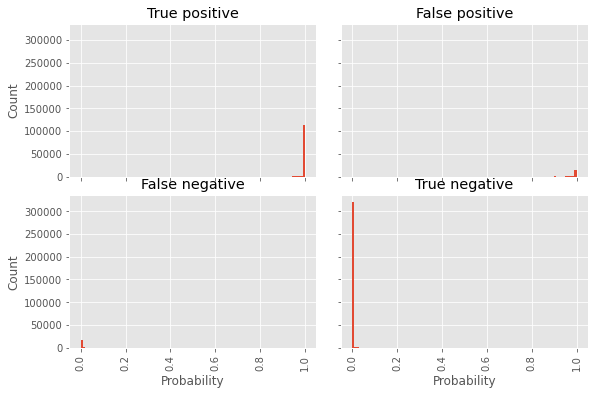

In [23]:
analysis_utilities.detection_evaluation(df, sharey="all", number_of_bins=100)

In [24]:
1 - ((df["p"] < 0.01) | (df["p"] > 0.99)).sum() / len(df.index)

0.06503928170594842

In [25]:
1 - ((df["p"] < 0.05) | (df["p"] > 0.95)).sum() / len(df.index)

0.03905723905723901

In [26]:
analysis_utilities.detection_evaluation(df, sharey="row",number_of_bins=100).savefig("flights_detection_split.pdf", dpi=600)

In [27]:
analysis_utilities.detection_evaluation_without_grouping(df,number_of_bins=100).savefig("flights_detection_overview.pdf", dpi=600)

In [28]:
(df["p"] >= 0.99).sum() / (df["p"] >= 0.5).sum()

0.8905712082403812

In [44]:
(df["detected"] & ~df["truth"] & df["p"] >= 0.99).sum() / (df["detected"] & df["p"] >= 0.99).sum()

0.15593348710710228

## Analyze confidence vs error probability

In [29]:
r_p_dfs = []

for d in datasets:

    r_p_dfs.append(analysis_utilities.get_correction_confidence_df(d))

r_p_df = pandas.concat(r_p_dfs)

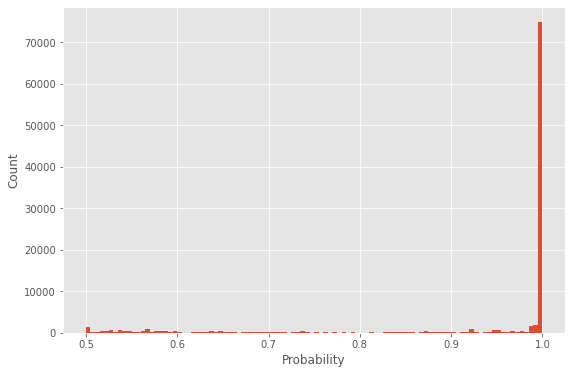

In [30]:
analysis_utilities.correction_confidence_distribution(r_p_df, number_of_bins=100)

In [31]:
(r_p_df["confidence"] >= 0.99).sum() / len(r_p_df.index)

0.7615249371728269

In [32]:
(r_p_df["confidence"] >= 0.95).sum() / len(r_p_df.index)

0.7975326055645505

In [45]:
((r_p_df["confidence"] >= 0.99) & (r_p_df["detection_correct"] == False)).sum() / (r_p_df["confidence"] >= 0.99).sum()

0.061488293223765735

In [47]:
((r_p_df["confidence"] >= 0.99) & (r_p_df["detection_correct"] == False)).sum() / (r_p_df["detection_correct"] == False).sum()

0.5131722185935119

In [34]:
((r_p_df["confidence"] >= 0.99) & (r_p_df["detection_correct"] == True)).sum() / (r_p_df["detection_correct"] == True).sum()

0.7864614644703619

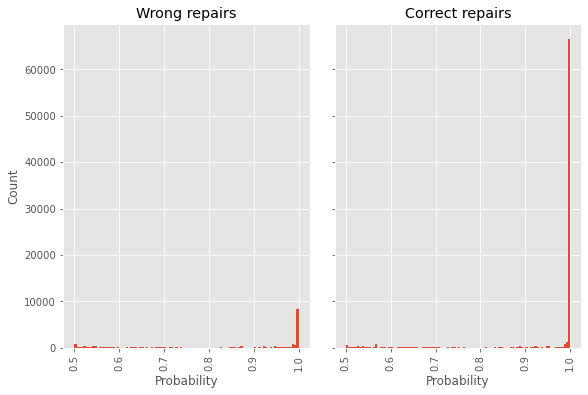

In [35]:
analysis_utilities.correction_confidence_distributions(r_p_df, number_of_bins=100)

In [36]:
analysis_utilities.correction_confidence_distribution(r_p_df, number_of_bins=100).savefig("flights_correction_overview.pdf")
analysis_utilities.correction_confidence_distributions(r_p_df, number_of_bins=100).savefig("flights_correction_split.pdf")

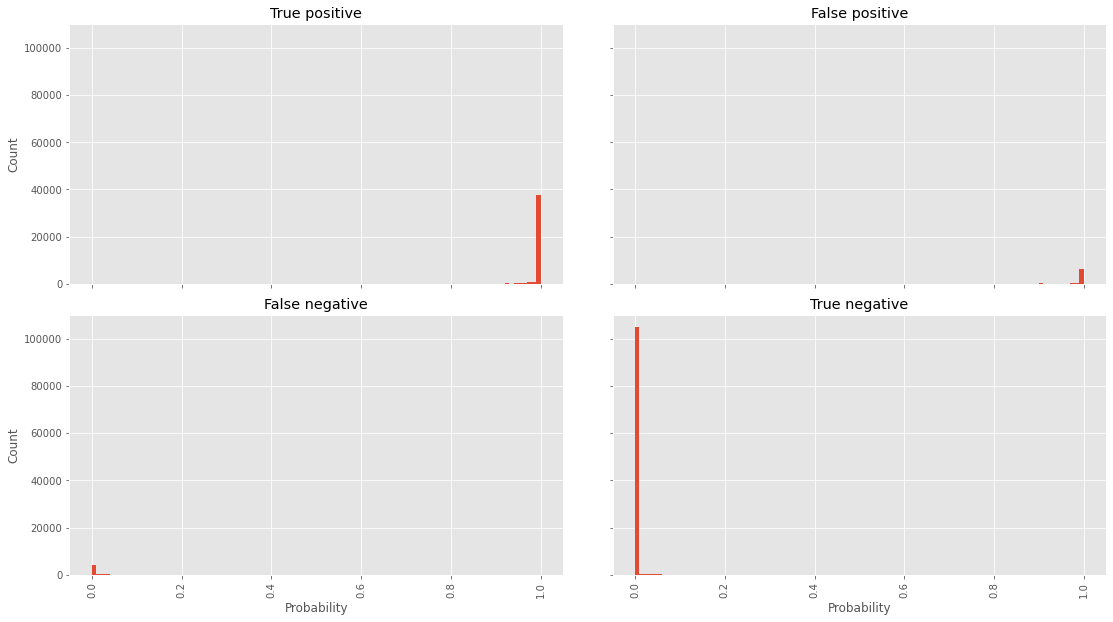